In [1]:
%matplotlib inline
import numpy
import os
import os.path
import pandas
import re
import skimage
import skimage.io

In [21]:
image_directory =r"C:/Users/Prakrith/Documents/GitHub/2017_06_20_Machlus_megakarocyte_differentiation/170713/"
regex_image = ".*\.tif"

In [22]:
re_image = re.compile(regex_image)

In [23]:
def is_my_file(filename, re_obj):
    
    mybool = False
    
    if re_obj.match(filename) is not None:
        
        mybool = True
        
    return mybool
def make_dict(filename, path, re_obj):
    
    my_dict = re_obj.match(filename).groupdict()
    
    my_dict["filename"] = filename
    
    my_dict["path"] = path
    
    return my_dict

In [24]:
image_files_dict = [make_dict(f, image_directory, re_image) for f in os.listdir(image_directory) if is_my_file(f, re_image)]

In [26]:
image_files_dict

[{'filename': 'A2_3_t1.tif',
  'path': 'C:/Users/Prakrith/Documents/GitHub/2017_06_20_Machlus_megakarocyte_differentiation/170713/'},
 {'filename': 'B4_2_t1.tif',
  'path': 'C:/Users/Prakrith/Documents/GitHub/2017_06_20_Machlus_megakarocyte_differentiation/170713/'},
 {'filename': 'C2_3_t1.tif',
  'path': 'C:/Users/Prakrith/Documents/GitHub/2017_06_20_Machlus_megakarocyte_differentiation/170713/'},
 {'filename': 'D1_1_t1.tif',
  'path': 'C:/Users/Prakrith/Documents/GitHub/2017_06_20_Machlus_megakarocyte_differentiation/170713/'}]

In [27]:
image_df = pandas.DataFrame(image_files_dict)

In [29]:
def df_stack_image(p):
    
    im = skimage.io.imread(os.path.join(p["path"], p["filename"]))
    
    skimage.io.imshow(im)

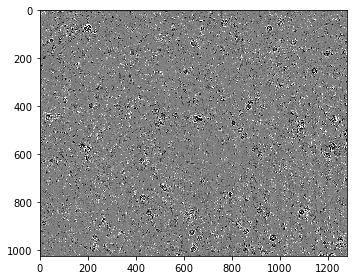

In [30]:
_ = image_df.apply(df_stack_image, axis=1)